# Inputs

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [58]:
# Import the data from a Json file

with open('/content/StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2020-02-26 22:31', 'artistName': 'Khruangbin', 'trackName': 'Conversion', 'msPlayed': 6270}, {'endTime': '2020-02-26 22:32', 'artistName': 'Khruangbin', 'trackName': 'Conversion', 'msPlayed': 33754}, {'endTime': '2020-02-26 22:34', 'artistName': 'Wilco', 'trackName': 'Bright Leaves', 'msPlayed': 131095}, {'endTime': '2020-02-26 22:39', 'artistName': 'The Prodigy', 'trackName': 'Out Of Space', 'msPlayed': 298113}, {'endTime': '2020-02-26 22:41', 'artistName': 'Primus', 'trackName': 'John the Fisherman', 'msPlayed': 129479}]


In [59]:
# Convert from JSON to a data frame

history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [60]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  10000 non-null  object
 1   end_time     10000 non-null  object
 2   ms_played    10000 non-null  int64 
 3   track_name   10000 non-null  object
dtypes: int64(1), object(3)
memory usage: 312.6+ KB


In [61]:
with open('/content/StreamingHistory1.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2021-01-15 23:49', 'artistName': 'Parliament', 'trackName': 'Unfunky UFO', 'msPlayed': 264093}, {'endTime': '2021-01-15 23:51', 'artistName': 'Kamasi Washington', 'trackName': 'Clair de Lune', 'msPlayed': 82551}, {'endTime': '2021-01-16 00:02', 'artistName': 'Cymande', 'trackName': 'Dove', 'msPlayed': 655440}, {'endTime': '2021-01-16 00:08', 'artistName': 'Herbie Hancock', 'trackName': 'Watermelon Man', 'msPlayed': 388960}, {'endTime': '2021-01-16 00:14', 'artistName': 'St. Paul & The Broken Bones', 'trackName': 'Sanctify', 'msPlayed': 355626}]


In [62]:
history_2 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_2['artist_name'] = extract_json_value('artistName')
history_2['end_time'] = extract_json_value('endTime')
history_2['ms_played'] = extract_json_value('msPlayed')
history_2['track_name'] = extract_json_value('trackName')

In [63]:
history_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2314 entries, 0 to 2313
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  2314 non-null   object
 1   end_time     2314 non-null   object
 2   ms_played    2314 non-null   int64 
 3   track_name   2314 non-null   object
dtypes: int64(1), object(3)
memory usage: 72.4+ KB


In [64]:
history = history_1.append(history_2)

In [65]:
history

,artist_name,end_time,ms_played,track_name
0,Khruangbin,2020-02-26 22:31,6270,Conversion
1,Khruangbin,2020-02-26 22:32,33754,Conversion
2,Wilco,2020-02-26 22:34,131095,Bright Leaves
3,The Prodigy,2020-02-26 22:39,298113,Out Of Space
4,Primus,2020-02-26 22:41,129479,John the Fisherman
...,...,...,...,...
2309,Gwen Guthrie,2021-02-26 23:33,300002,Peanut Butter
2310,Grace Jones,2021-02-26 23:38,242129,Feel Up
2311,Rinder & Lewis,2021-02-26 23:47,566120,Lust - Disco Remix
2312,Blaze,2021-02-26 23:54,430336,Seasons of Love


In [66]:
#converting end_time to timestamp format
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Khruangbin,2020-02-26 22:31:00,6270,Conversion
1,Khruangbin,2020-02-26 22:32:00,33754,Conversion
2,Wilco,2020-02-26 22:34:00,131095,Bright Leaves
3,The Prodigy,2020-02-26 22:39:00,298113,Out Of Space
4,Primus,2020-02-26 22:41:00,129479,John the Fisherman


In [67]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Khruangbin,2020-02-26 22:31:00,Conversion,0.104500
1,Khruangbin,2020-02-26 22:32:00,Conversion,0.562567
2,Wilco,2020-02-26 22:34:00,Bright Leaves,2.184917
3,The Prodigy,2020-02-26 22:39:00,Out Of Space,4.968550
4,Primus,2020-02-26 22:41:00,John the Fisherman,2.157983


# Popularity of artist based on the number of times their songs were clicked and played

In [68]:

most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:15]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
Talking Heads                   339
Nightmares On Wax               207
Phish                           191
Khruangbin                      176
Trey Anastasio                  140
Beastie Boys                    138
Kurt Vile                       135
Unknown Artist                  123
Sylvan Esso                     117
Vulfpeck                        114
Herbie Hancock                  109
Jerry Garcia Band               109
Jeff Tweedy                     101
Grateful Dead                   100
The Brian Jonestown Massacre     96
Name: track_name, dtype: int64


In [80]:
# Visualize the most popular artists with a standard bar chart

colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)])
fig.show(renderer="colab")

# Popularity of artist based on the total amount of time spent listening to their songs

In [29]:
# Look at most popular artists by amount of time spent listening to their songs

amount_of_time = history.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

amount_of_time

artist_name
Talking Heads                   1234.956333
Phish                           1027.879333
Nightmares On Wax                838.469283
Jerry Garcia Band                832.966567
Herbie Hancock                   712.969000
Khruangbin                       653.898433
Kurt Vile                        559.735300
Grateful Dead                    551.724433
Trey Anastasio                   530.285283
Stéphane Grappelli               415.770633
Umphrey's McGee                  402.946850
Sylvan Esso                      380.949567
The Brian Jonestown Massacre     364.402200
Jerry Garcia                     362.703833
Beastie Boys                     362.473200
Name: minutes_played, dtype: float64

In [81]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']

layout = go.Layout(
    title='Popularity of artists by amount of time spent listening to their song',
    yaxis= dict(
        title='Amount of time (in minutes)',
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis= dict(
        title = 'Artist Name'))


fig = go.Figure(data=[go.Bar(x=amount_of_time.index,
                             y=amount_of_time,
                             opacity=1,
                            marker_color=colors)])

fig.show(renderer="colab")


# Total amount of time spent listening to music each day

In [31]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Khruangbin,Conversion,0.104500,2020-02-26,22:31:00
1,Khruangbin,Conversion,0.562567,2020-02-26,22:32:00
2,Wilco,Bright Leaves,2.184917,2020-02-26,22:34:00
3,The Prodigy,Out Of Space,4.968550,2020-02-26,22:39:00
4,Primus,John the Fisherman,2.157983,2020-02-26,22:41:00


In [32]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2020-02-26,14.712367
1,2020-02-27,54.192933
2,2020-02-28,7.625117
3,2020-03-01,0.202333
4,2020-03-02,140.532783


In [82]:
fig = px.line(day, x="day", y="minutes_played",
              labels={
                     "day": "Month",
                     "minutes_played": "Minutes Played"},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Timeline Of My Streaming History")

fig.show(renderer="colab")

# Time spent listening on each day of the week

In [34]:
date = history_1.append(history_2)
date['minutes_played'] = date.ms_played.divide(60000)
date.drop('ms_played', axis=1, inplace=True)

date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()

,artist_name,end_time,track_name,minutes_played,day
0,Khruangbin,2020-02-26 22:31,Conversion,0.104500,Wednesday
1,Khruangbin,2020-02-26 22:32,Conversion,0.562567,Wednesday
2,Wilco,2020-02-26 22:34,Bright Leaves,2.184917,Wednesday
3,The Prodigy,2020-02-26 22:39,Out Of Space,4.968550,Wednesday
4,Primus,2020-02-26 22:41,John the Fisherman,2.157983,Wednesday


In [35]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head()

,day,minutes_played
0,Friday,6860.736617
1,Monday,6013.487800
2,Saturday,6387.752517
3,Sunday,6786.118067
4,Thursday,6694.538717


In [83]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show(renderer="colab")

# Artist and their songs

In [37]:
artist = history_1.append(history_2)
artist['minutes_played'] = artist.ms_played.divide(60000)
artist.drop('ms_played', axis=1, inplace=True)
artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played
0,Khruangbin,Conversion,0.104500
1,Khruangbin,Conversion,0.562567
2,Wilco,Bright Leaves,2.184917
3,The Prodigy,Out Of Space,4.968550
4,Primus,John the Fisherman,2.157983


In [38]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Khruangbin,Conversion
2,Wilco,Bright Leaves
3,The Prodigy,Out Of Space
4,Primus,John the Fisherman
9,Primus,Groundhog's Day
...,...,...
2309,Gwen Guthrie,Peanut Butter
2310,Grace Jones,Feel Up
2311,Rinder & Lewis,Lust - Disco Remix
2312,Blaze,Seasons of Love


In [39]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,!!!,1
1,"""Weird Al"" Yankovic",49
2,&ME,2
3,1200 Micrograms,4
4,13th Floor Elevators,1
...,...,...
2223,ricky retro,1
2224,the olllam,4
2225,toe,1
2226,Édouard Lalo,1


In [40]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,!!!,1
1,"""Weird Al"" Yankovic",49
2,&ME,2
3,1200 Micrograms,4
4,13th Floor Elevators,1


In [41]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,!!!,5.322667
1,"""Weird Al"" Yankovic",193.985100
2,&ME,16.057867
3,1200 Micrograms,25.970533
4,13th Floor Elevators,2.445617


In [42]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(20)
top_artist

,artist_name,unique_songs,minutes_played
1805,Talking Heads,101,1234.956333
1071,Kurt Vile,91,559.735300
1459,Phish,73,1027.879333
1854,The Brian Jonestown Massacre,70,364.402200
1766,Stéphane Grappelli,65,415.770633
1360,Nightmares On Wax,65,838.469283
773,Grateful Dead,62,551.724433
2054,Trey Anastasio,60,530.285283
1785,Sylvan Esso,58,380.949567
178,Beastie Boys,57,362.473200


In [84]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show(renderer="colab")

# Most listened to song

In [44]:
song = history_1.append(history_2)
song['minutes_played'] = song.ms_played.divide(60000)
song.drop('ms_played', axis=1, inplace=True)
song

,artist_name,end_time,track_name,minutes_played
0,Khruangbin,2020-02-26 22:31,Conversion,0.104500
1,Khruangbin,2020-02-26 22:32,Conversion,0.562567
2,Wilco,2020-02-26 22:34,Bright Leaves,2.184917
3,The Prodigy,2020-02-26 22:39,Out Of Space,4.968550
4,Primus,2020-02-26 22:41,John the Fisherman,2.157983
...,...,...,...,...
2309,Gwen Guthrie,2021-02-26 23:33,Peanut Butter,5.000033
2310,Grace Jones,2021-02-26 23:38,Feel Up,4.035483
2311,Rinder & Lewis,2021-02-26 23:47,Lust - Disco Remix,9.435333
2312,Blaze,2021-02-26 23:54,Seasons of Love,7.172267


In [45]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
6277,Unknown Track,351.190550
960,Chameleon,141.480200
1655,Eminence Front,117.486733
3003,Jessica,99.719400
4401,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
...,...,...
1180,Crash into Me,0.000000
3056,Just A Lil Bit,0.000000
3274,Let My Love Open The Door,0.000000
779,Brilliant Blues,0.000000


In [46]:
song_artist = history_1.append(history_2)
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop('end_time', axis=1, inplace=True)
song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
4101,toe,孤独の発明
3974,toe,孤独の発明
3620,toe,孤独の発明
3627,toe,孤独の発明
4445,toe,孤独の発明
4032,toe,孤独の発明
632,DakhaBrakha,Монах
5202,DakhaBrakha,Монах
2682,DakhaBrakha,Монах
3650,DakhaBrakha,Монах


In [47]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist

,artist_name,track_name
4101,toe,孤独の発明
632,DakhaBrakha,Монах
7793,O Rappa,Óbvio
6828,Huaira,Ñuka Shunku
1058,TOOL,Ænema
...,...,...
2166,Bobby McFerrin,'Round Midnight - Live
67,Ella Fitzgerald,'Deed I Do
7010,Lemon Jelly,'75 aka Stay With You
2373,Reply All,#161 Brian vs. Brian


In [48]:
song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
522,Unknown Artist,Unknown Track,351.190550
5839,Herbie Hancock,Chameleon,141.480200
5144,The Who,Eminence Front,117.486733
3796,Allman Brothers Band,Jessica,99.719400
2398,Grateful Dead,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
...,...,...,...
2316,Pete Townshend,Prologue - 1945,0.000000
912,Pete Townshend,The Real Me - Demo,0.000000
458,"""Weird Al"" Yankovic",Virus Alert,0.000000
4654,Pete Townshend,Give Blood,0.000000


In [49]:
song = song.sort_values(by='minutes_played', ascending=False).head(16)
song.reset_index(inplace = True, drop = True) 
song

,artist_name,track_name,minutes_played
0,Unknown Artist,Unknown Track,351.190550
1,Herbie Hancock,Chameleon,141.480200
2,The Who,Eminence Front,117.486733
3,Allman Brothers Band,Jessica,99.719400
4,Grateful Dead,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
5,Trey Anastasio,Drift While You’re Sleeping,89.311483
6,Steely Dan,Peg,84.347417
7,The Pharcyde,Passin' Me By,78.926167
8,Jerry Garcia Band,Tangled Up in Blue - Live,73.682600
9,Nightmares On Wax,70s 80s,71.713983


In [50]:
songs = song.drop(song.index[0])
songs

,artist_name,track_name,minutes_played
1,Herbie Hancock,Chameleon,141.480200
2,The Who,Eminence Front,117.486733
3,Allman Brothers Band,Jessica,99.719400
4,Grateful Dead,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
5,Trey Anastasio,Drift While You’re Sleeping,89.311483
6,Steely Dan,Peg,84.347417
7,The Pharcyde,Passin' Me By,78.926167
8,Jerry Garcia Band,Tangled Up in Blue - Live,73.682600
9,Nightmares On Wax,70s 80s,71.713983
10,Grateful Dead,"Eyes of the World - Live at P.N.E. Coliseum, V...",67.153333


In [85]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show(renderer="colab")

# Top 50 Songs

In [53]:
top_50 = history_1.append(history_2)
top_50['minutes_played'] = top_50.ms_played.divide(60000)
top_50.drop('ms_played', axis=1, inplace=True)
top_50

,artist_name,end_time,track_name,minutes_played
0,Khruangbin,2020-02-26 22:31,Conversion,0.104500
1,Khruangbin,2020-02-26 22:32,Conversion,0.562567
2,Wilco,2020-02-26 22:34,Bright Leaves,2.184917
3,The Prodigy,2020-02-26 22:39,Out Of Space,4.968550
4,Primus,2020-02-26 22:41,John the Fisherman,2.157983
...,...,...,...,...
2309,Gwen Guthrie,2021-02-26 23:33,Peanut Butter,5.000033
2310,Grace Jones,2021-02-26 23:38,Feel Up,4.035483
2311,Rinder & Lewis,2021-02-26 23:47,Lust - Disco Remix,9.435333
2312,Blaze,2021-02-26 23:54,Seasons of Love,7.172267


In [54]:
top_50 = top_50.groupby(['track_name'], as_index=False).sum()
top_50 = top_50.sort_values(by='minutes_played', ascending=False).head(51)
top_50.reset_index(inplace = True, drop = True) 
top_50

,track_name,minutes_played
0,Unknown Track,351.190550
1,Chameleon,141.480200
2,Eminence Front,117.486733
3,Jessica,99.719400
4,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
5,Drift While You’re Sleeping,89.311483
6,Peg,84.347417
7,Passin' Me By,78.926167
8,Tangled Up in Blue - Live,73.682600
9,70s 80s,71.713983


In [55]:
top_50.drop(top_50.index[0])

,track_name,minutes_played
1,Chameleon,141.480200
2,Eminence Front,117.486733
3,Jessica,99.719400
4,Playing in the Band - Live at Hec Edmundson Pa...,93.069167
5,Drift While You’re Sleeping,89.311483
6,Peg,84.347417
7,Passin' Me By,78.926167
8,Tangled Up in Blue - Live,73.682600
9,70s 80s,71.713983
10,"Eyes of the World - Live at P.N.E. Coliseum, V...",67.153333


# Visualisation

acousticness - float - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

danceability - float - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

energy - float - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

instrumentalness - float - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.

liveness - float - Detects the presence of an audience in the recording.

loudness - float - The overall loudness of a track in decibels (dB). 

speechiness - float - Speechiness detects the presence of spoken words in a track.

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. 

tempo - float - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration

mode - int - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

key - int - The estimated overall key of the track.

In [56]:
my_songs = pd.read_csv("song.csv", encoding= 'unicode_escape')
my_songs.drop('Unnamed: 15', axis=1, inplace=True)
my_songs.drop('Unnamed: 14', axis=1, inplace=True)
my_songs.drop('Unnamed: 16', axis=1, inplace=True)
my_songs.head()

FileNotFoundError: ignored

# Spider Graph Comparisson of top 5

In [ ]:
top_5 = my_songs.head(6)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('instrumentalness', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5.drop('time_signature', axis=1, inplace=True)
top_5

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,danceability,energy,loudness,speechiness,acousticness
0,Gayatri Mantra 108 Times,0.635,0.704,-2.394,0.043,0.720
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [ ]:
top_5.drop(top_5.index[0])

,track_name,danceability,energy,loudness,speechiness,acousticness
1,Memories,0.764,0.320,-7.209,0.055,0.837
2,Circles,0.695,0.762,-3.497,0.040,0.192
3,Lose You To Love Me,0.488,0.343,-8.985,0.044,0.556
4,Photograph,0.614,0.379,-10.480,0.048,0.607
5,Trampoline (with ZAYN),0.616,0.736,-3.708,0.077,0.570


In [ ]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'acousticness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.764,0.320,-7.209,0.055,0.837],
      theta=categories,
      fill='toself',
      name='Memories'
))

fig.add_trace(go.Scatterpolar(
      r=[0.695,0.762,-3.497,0.040,0.192],
      theta=categories,
      fill='toself',
      name='Circles'
))


fig.add_trace(go.Scatterpolar(
      r=[0.488,0.343,-8.985,0.044,0.556],
      theta=categories,
      fill='toself',
      name='Lose You To Love Me'
))

fig.update_layout(
    title = "Diversity in audio features of top 3 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)

fig.show()

In [ ]:
my_songs.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.622140], 
                             "energy":[0.593160],
                             "key":[5.940000],
                             "loudness":[-6.460500],
                             "mode":[0.800000],
                             "speechiness":[0.067240],
                             "acousticness":[0.359720],
                             "instrumentalness":[0.002873],
                             "liveness":[0.155520],
                             "valence":[0.454660],
                             "tempo":[116.117440],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.002873,0.15552,0.45466,116.11744,252700.72,3.92


# Happy or Sad?

valence - float - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. The closer it is to 1, the more positive/happy

In [ ]:
v = [0.448,0.575,0.553,0.098,0.201,0.673,0.246,0.419,0.604,0.417,0.864,0.168,0.471,0.223,0.678,0.424,0.446,0.355,0.244,0.376,0.534,0.38,0.394,0.569,0.569,0.422,0.746,0.538,0.661,0.443,0.441,0.913,0.345,0.545,0.292,0.75,0.286,0.671,0.374,0.289,0.678,0.37,0.334,0.619,0.131,0.276,0.341,0.417,0.515,0.407]
  
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in v: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  31
More than 0.6:  11
Between 0.5 and 0.6:  8


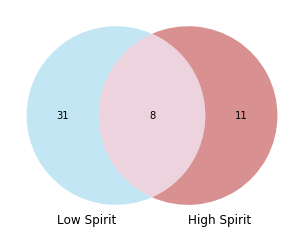

In [ ]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2_unweighted(subsets = (31, 11, 8), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('skyblue', 'firebrick'), alpha = 0.5);

# Fast or Slow?

In [ ]:
fig = px.box(my_songs, y="tempo")
fig.show()

# World Wide

In [ ]:
ww = pd.read_csv('top50.csv', encoding= 'unicode_escape')
ww.drop('Unnamed: 0', axis=1, inplace=True)
ww.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
ww.mean(axis=0)
avg_ww = pd.DataFrame({"danceability":[71.38/100], 
                             "energy":[64.06/100],
                             "key":[5.940000],
                             "loudness":[-5.66],
                             "mode":[0.800000],
                             "speechiness":[12.48/100],
                             "acousticness":[22.16/100],
                             "instrumentalness":[0.002873],
                             "liveness":[14.66/100],
                             "valence":[54.60/100],
                             "tempo":[120.06],
                             "duration_ms":[252700.720000],
                             "time_signature":[3.920000]})

avg_ww.drop('duration_ms', axis=1, inplace=True)
avg_ww.drop('time_signature', axis=1, inplace=True)
avg_ww.drop('instrumentalness', axis=1, inplace=True)
avg_ww['Who'] = 'Everyone'

avg_ww


,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.7138,0.6406,5.94,-5.66,0.8,0.1248,0.2216,0.1466,0.546,120.06,Everyone


In [ ]:
avg_my_songs['Who'] = 'Me'
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [ ]:
average = avg_ww.append(avg_my_songs)
average

,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,Who
0,0.71380,0.64060,5.94,-5.6600,0.8,0.12480,0.22160,0.14660,0.54600,120.06000,Everyone
0,0.62214,0.59316,5.94,-6.4605,0.8,0.06724,0.35972,0.15552,0.45466,116.11744,Me


In [ ]:
average.to_excel('song12.xlsx', index=True)

In [ ]:
average_comp = pd.read_csv('song12.csv', encoding= 'unicode_escape')
average_comp.rename(columns = {"Unnamed: 0":"Feature"}, inplace = True)
average_comp

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
2,key,5.9400,5.94000
3,loudness,-5.6600,-6.46050
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466
9,tempo,120.0600,116.11744


In [ ]:
average_compare = average_comp.drop(average_comp.index[9])
average_compare = average_compare.drop(average_compare.index[2])
compare_features = average_compare.drop(average_compare.index[2])
compare_features

,Feature,Everyone,Me
0,danceability,0.7138,0.62214
1,energy,0.6406,0.59316
4,mode,0.8000,0.80000
5,speechiness,0.1248,0.06724
6,acousticness,0.2216,0.35972
7,liveness,0.1466,0.15552
8,valence,0.5460,0.45466


In [ ]:

trace1=go.Bar(x=compare_features['Feature'],y=compare_features['Everyone'],marker=dict(color='firebrick',opacity=1),name="Everyone")
trace2=go.Bar(x=compare_features['Feature'],y=compare_features['Me'],marker=dict(color='darksalmon',opacity=1),name="Me")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS The World's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()


In [ ]:
loudness = pd.DataFrame({"Who":['Everyone', 'Me'],"Loudness":[-5.6600,-6.4605]})
loudness

,Who,Loudness
0,Everyone,-5.6600
1,Me,-6.4605


In [ ]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()

In [ ]:
tempo = pd.DataFrame({"Who":['Everyone', 'Me'],"Tempo":[120.06000,116.11744]})
tempo


,Who,Tempo
0,Everyone,120.06000
1,Me,116.11744


In [ ]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()